In [1]:
# importing all libraries to the notebook
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns # library to visualize regression plots
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import types
from botocore.client import Config
import ibm_boto3

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2019-06,Greater Manchester Police,Greater Manchester Police,-2.464422,53.612495,On or near Parking Area,E01004768,Bolton 001A,Anti-social behaviour,NaN,NaN
1,aa1cc4cb0c436f463635890bcb4ff2cba08f599250b5bb...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.441166,53.616044,On or near Pitcombe Close,E01004768,Bolton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
2,e513df6325ec2043d6b53c7888329f14eb66c8ea8217af...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.444807,53.611509,On or near Belmont Road,E01004768,Bolton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,6ed763df57793b0ab4ab0a1962aab3e577577ddb8d382e...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.444807,53.611509,On or near Belmont Road,E01004768,Bolton 001A,Violence and sexual offences,Status update unavailable,NaN
4,780d55b86bf1b85467f56404b01271c6bad54db206f07d...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.448666,53.606272,On or near Sports/Recreation Area,E01004768,Bolton 001A,Violence and sexual offences,Status update unavailable,NaN


In [3]:
df.drop(['Crime ID','Month','Reported by','Falls within','Crime type','Last outcome category','Context','Location','LSOA code'],axis=1,inplace=True) # dropping data in columns we don't require
df['LSOA name'] = df['LSOA name'].astype(str).str[:-4] # removing the last 4 characters in the LSOA name column, which is the LSOA number associated with the district
df.columns=['Longitude','Latitude','District'] # renaming the columns
df = df[['District', 'Latitude', 'Longitude']] # simple reordering of the columns

In [4]:
df.District.astype(str) # setting the column type for District as being of type string
df5=df[df.District != 'Cheshire East ']
df5=df5[df5.District != 'Rossendale ']
df5=df5[df5.District != 'Warrington ']
df5=df5[df5.District != 'West Lancashire '] # removing data from the dataframe which don't fall under the Greater Manchester county

In [5]:
df6=df5.groupby('District').count() # using groupby to count the number of crimes committed for each district
df6.drop('Longitude',axis=1,inplace=True) # dropping the extra column as both longitude and latitude columns show the same number of crimes committed
df6.columns=['Number of Crimes Committed'] # setting the column name to "Number of Crimes Committed"
df6

,Number of Crimes Committed
District,
Bolton,3610
Bury,1822
Manchester,8828
Oldham,2842
Rochdale,2510
Salford,2771
Stockport,2424
Tameside,2548
Trafford,1764


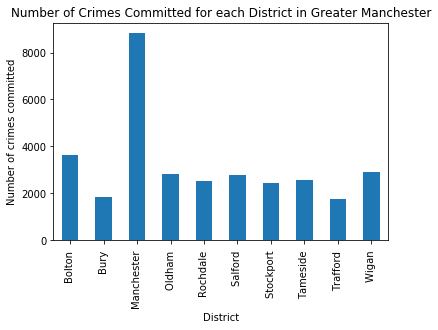

In [6]:
# plotting the dataframe above as a bar plot
df6.plot(kind='bar',legend=None)
plt.title('Number of Crimes Committed for each District in Greater Manchester')
plt.xlabel('District')
plt.ylabel('Number of crimes committed')
plt.show()

In [7]:
# instantiating district names to retrieve coordinates using geopy
address = ['Bury, Greater Manchester', 'Bolton, Greater Manchester', 'Manchester, Greater Manchester', 'Oldham, Greater Manchester', 'Rochdale, Greater Manchester',
           'Salford, Greater Manchester', 'Stockport, Greater Manchester', 'Tameside, Greater Manchester', 'Trafford, Greater Manchester', 'Wigan, Greater Manchester']

geolocator = Nominatim(user_agent="gm_explorer")
lats=[]
longs=[]
for addr in address:
    location = geolocator.geocode(addr)
    latitude = location.latitude
    lats.append(latitude)
    longitude = location.longitude
    longs.append(longitude)
    print('The geographical coordinates of {} are {}, {}.'.format(addr,latitude, longitude))

The geographical coordinates of Bury, Greater Manchester are 53.5927543, -2.2972827.
The geographical coordinates of Bolton, Greater Manchester are 53.5782863, -2.4300367.
The geographical coordinates of Manchester, Greater Manchester are 53.4794892, -2.2451148.
The geographical coordinates of Oldham, Greater Manchester are 53.5415797, -2.1147831.
The geographical coordinates of Rochdale, Greater Manchester are 53.6153659, -2.1557561.
The geographical coordinates of Salford, Greater Manchester are 53.4877463, -2.2891921.
The geographical coordinates of Stockport, Greater Manchester are 53.407901, -2.160243.
The geographical coordinates of Tameside, Greater Manchester are 53.4786454, -2.07702116337052.
The geographical coordinates of Trafford, Greater Manchester are 53.41893605, -2.35929716116527.
The geographical coordinates of Wigan, Greater Manchester are 53.5457188, -2.6264624.


In [8]:
# creating pandas dataframe using address, latitude and longitude coordinates retrieved using geopy
gm_districts=pd.DataFrame(data=[address,lats,longs]).transpose()
gm_districts.columns=['District', 'Latitude', 'Longitude']
gm_districts

,District,Latitude,Longitude
0,"Bury, Greater Manchester",53.5928,-2.29728
1,"Bolton, Greater Manchester",53.5783,-2.43004
2,"Manchester, Greater Manchester",53.4795,-2.24511
3,"Oldham, Greater Manchester",53.5416,-2.11478
4,"Rochdale, Greater Manchester",53.6154,-2.15576
5,"Salford, Greater Manchester",53.4877,-2.28919
6,"Stockport, Greater Manchester",53.4079,-2.16024
7,"Tameside, Greater Manchester",53.4786,-2.07702
8,"Trafford, Greater Manchester",53.4189,-2.3593
9,"Wigan, Greater Manchester",53.5457,-2.62646


In [9]:
# create map of Greater Manchester using latitude and longitude values
address_gm = 'Greater Manchester, North West England'
geolocator_gm = Nominatim(user_agent="gm_explorer")
location_gm = geolocator_gm.geocode(address_gm)
latitude_gm = location_gm.latitude
longitude_gm = location_gm.longitude
map_gm = folium.Map(location=[latitude_gm, longitude_gm], zoom_start=10)

# add markers to map
for lats, longs, addr in zip(gm_districts['Latitude'], gm_districts['Longitude'], gm_districts['District']):
    label = '{}'.format(addr)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lats, longs],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gm)  
    
map_gm

In [10]:
# foursquare developer credentials
CLIENT_ID = 'GJ3N4RUAQXCD2LOKHCCOWKI5EMKPC4MS2R54BJP4UGJLRPW1' # your Foursquare ID
CLIENT_SECRET = 'G3JTONDNIOPKPD1PWJRGDGTJ0FKRTVN2HAIL4HUQGBAWAO4Z' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GJ3N4RUAQXCD2LOKHCCOWKI5EMKPC4MS2R54BJP4UGJLRPW1
CLIENT_SECRET:G3JTONDNIOPKPD1PWJRGDGTJ0FKRTVN2HAIL4HUQGBAWAO4Z


In [11]:
# creation of function to retrieve nearby venues for Greater Manchester using foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
gm_venues = getNearbyVenues(names=gm_districts['District'],
                                   latitudes=gm_districts['Latitude'],
                                   longitudes=gm_districts['Longitude']
                                  )

Bury, Greater Manchester
Bolton, Greater Manchester
Manchester, Greater Manchester
Oldham, Greater Manchester
Rochdale, Greater Manchester
Salford, Greater Manchester
Stockport, Greater Manchester
Tameside, Greater Manchester
Trafford, Greater Manchester
Wigan, Greater Manchester


In [13]:
print(gm_venues.shape) # printing shape of retrieved venues from foursquare
gm_venues.head()

(337, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bury, Greater Manchester",53.592754,-2.297283,East Lancashire Railway,53.592938,-2.300129,Train Station
1,"Bury, Greater Manchester",53.592754,-2.297283,The Met Arts Centre,53.593005,-2.297156,Performing Arts Venue
2,"Bury, Greater Manchester",53.592754,-2.297283,The Trackside,53.592906,-2.300116,Pub
3,"Bury, Greater Manchester",53.592754,-2.297283,Bury Art Museum & Sculpture Centre,53.591792,-2.298846,Art Museum
4,"Bury, Greater Manchester",53.592754,-2.297283,Bury Market,53.591960,-2.294038,Farmers Market


In [14]:
# code to keep district name only in the Area column, removing ", Greater Manchester"
areas_m=gm_venues['Area'].astype(str)

for i, row in enumerate(areas_m):
    areas_m[i]=areas_m[i].split(',')[0]

gm_venues['Area']=areas_m
gm_venues.head() # display resulting dataframe following removals

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bury,53.592754,-2.297283,East Lancashire Railway,53.592938,-2.300129,Train Station
1,Bury,53.592754,-2.297283,The Met Arts Centre,53.593005,-2.297156,Performing Arts Venue
2,Bury,53.592754,-2.297283,The Trackside,53.592906,-2.300116,Pub
3,Bury,53.592754,-2.297283,Bury Art Museum & Sculpture Centre,53.591792,-2.298846,Art Museum
4,Bury,53.592754,-2.297283,Bury Market,53.591960,-2.294038,Farmers Market


In [15]:
gm_venues2=gm_venues.groupby('Area').count() # grouping venues by district and inserting into a new dataframe
gm_venues2=gm_venues2[['Venue']] # keeping only the venue column to show the number of venues per district
gm_venues2.columns=['Venues'] # renaming the Venue column to "Venues"
gm_venues2

,Venues
Area,
Bolton,41
Bury,48
Manchester,100
Oldham,26
Rochdale,19
Salford,18
Stockport,32
Tameside,4
Trafford,1


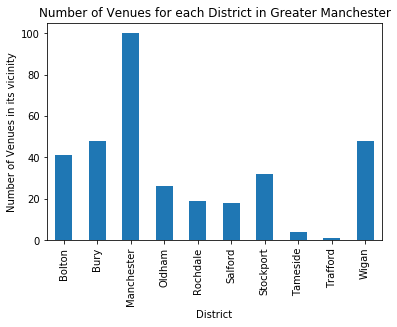

In [16]:
# bar plot of the number of venues per district in Greater Manchester
gm_venues2.plot(kind='bar',legend=None)
plt.title('Number of Venues for each District in Greater Manchester')
plt.xlabel('District')
plt.ylabel('Number of Venues in its vicinity')
plt.show()

In [17]:
dataf = gm_venues2 # setting a new dataframe dataf to the dataframe of venues grouped by district
dataf = dataf.assign(Crimes = df6.values) # adding a Crimes column to the dataframe and assigning its values to the new column
dataf = dataf.assign(Ratio = (dataf.Crimes/dataf.Venues)) # adding a new column Ratio to the dataframe where Ratio=Crimes/Venues
dataf.columns=['Venues','Crimes', 'Crimes per Venue'] # renaming the columns
dataf

,Venues,Crimes,Crimes per Venue
Area,,,
Bolton,41,3610,88.048780
Bury,48,1822,37.958333
Manchester,100,8828,88.280000
Oldham,26,2842,109.307692
Rochdale,19,2510,132.105263
Salford,18,2771,153.944444
Stockport,32,2424,75.750000
Tameside,4,2548,637.000000
Trafford,1,1764,1764.000000


In [18]:
# finding the correlation between Venues and Crimes in Greater Manchester
dataf[['Venues','Crimes',]].corr()

,Venues,Crimes
Venues,1.00000,0.83636
Crimes,0.83636,1.00000


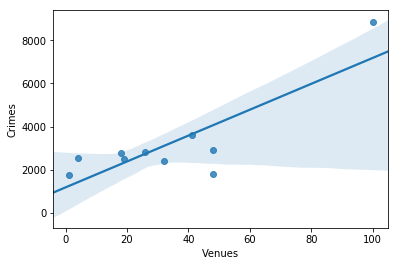

In [19]:
# regression plot of Venues and Crimes in Greater Manchester
sns.regplot(x="Venues", y="Crimes", data=dataf)